In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import logging
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc
#import keras
import tensorflow as tf
from time import time                                                       
import sys

In [3]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [4]:
adata_CRC = sc.read_h5ad("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/CRC_T_cell.h5ad")

In [5]:
adata_IBD = sc.read_h5ad("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/IBD_T_cell.h5ad")

In [6]:
adata_CRC

AnnData object with n_obs × n_vars = 8788 × 18258
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_id', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_biotype'

In [7]:
adata_IBD

AnnData object with n_obs × n_vars = 108118 × 16323
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'dataset', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.8'
    obsm: 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.8', 'X_umap', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.8'

In [8]:
#sc.pp.subsample(adata_IBD,n_obs=10000,random_state=123456)

In [9]:
adata_IBD

AnnData object with n_obs × n_vars = 108118 × 16323
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'dataset', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.8'
    obsm: 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.8', 'X_umap', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.8'

In [10]:
adata_CRC.obs['CellFromTumor'] = adata_CRC.obs['CellFromTumor'].map({True: 'Tumor_Involved', False: 'Tumor_UnInvolved'}) 

In [11]:
adata_CRC.obs

,CellId,CellFromTumor,PatientNumber,TumorType,TumorSite,CellType,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
barcode,,,,,,,,,,,,,,
scrEXT001_AAACCTGTCGTCCAGG,scrEXT001_AAACCTGTCGTCCAGG,Tumor_Involved,PTZ_31,CRC,C,T_cell,1297,3351.0,84.0,2.506715,795.0,23.724260,0.0,0.0
scrEXT001_AAACGGGTCGCATGGC,scrEXT001_AAACGGGTCGCATGGC,Tumor_Involved,PTZ_31,CRC,C,T_cell,741,1565.0,185.0,11.821086,103.0,6.581470,0.0,0.0
scrEXT001_AAAGATGAGAATTCCC,scrEXT001_AAAGATGAGAATTCCC,Tumor_Involved,PTZ_31,CRC,C,T_cell,663,1495.0,71.0,4.749164,423.0,28.294313,0.0,0.0
scrEXT001_AAATGCCCAGCGAACA,scrEXT001_AAATGCCCAGCGAACA,Tumor_Involved,PTZ_31,CRC,C,T_cell,1045,2493.0,105.0,4.211793,485.0,19.454473,0.0,0.0
scrEXT001_AACCATGCATTAACCG,scrEXT001_AACCATGCATTAACCG,Tumor_Involved,PTZ_31,CRC,C,T_cell,1168,3761.0,89.0,2.366392,1639.0,43.578835,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrEXT029_TGACAACGTATGAAAC,scrEXT029_TGACAACGTATGAAAC,Tumor_UnInvolved,PTZ_38,CRC,N,T_cell,688,1879.0,142.0,7.557211,672.0,35.763706,0.0,0.0
scrEXT029_TGACTAGGTGTTCTTT,scrEXT029_TGACTAGGTGTTCTTT,Tumor_UnInvolved,PTZ_38,CRC,N,T_cell,754,1679.0,128.0,7.623585,384.0,22.870756,0.0,0.0
scrEXT029_TGCCCATTCCTGTACC,scrEXT029_TGCCCATTCCTGTACC,Tumor_UnInvolved,PTZ_38,CRC,N,T_cell,289,591.0,106.0,17.935701,38.0,6.429780,0.0,0.0


In [12]:
adata_IBD.obs['CellFromTumor'] = adata_IBD.obs['CellType']

In [13]:
adata_CRC.obs['TumorSite'] = "Colon"

In [14]:
adata_IBD.obs['CellFromTumor'] = adata_IBD.obs['CellFromTumor'].map({'Involved': 'IBD_Involved', 'Uninvolved': 'IBD_UnInvolved'}) 


In [15]:
adata_IBD.obs

,CellId,CellFromTumor,PatientNumber,TumorType,TumorSite,CellType,dataset,batch,n_genes_by_counts,total_counts,...,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt2,n_counts,n_genes,desc_0.4,desc_0.5,desc_0.6,desc_0.8
AAACATACACACCA-1-0,AAACATACACACCA-1,IBD_Involved,Ptz5,IBD,Ileum,Involved,GSE134809,0,500,1233.0,...,33.819954,1.0,0.081103,0.012165,1233.0,500,7,8,7,3
AAACGCTGAGAATG-1-0,AAACGCTGAGAATG-1,IBD_Involved,Ptz5,IBD,Ileum,Involved,GSE134809,0,274,695.0,...,41.151081,0.0,0.000000,0.028777,695.0,274,0,0,0,0
AAACGCTGCTACCC-1-0,AAACGCTGCTACCC-1,IBD_Involved,Ptz5,IBD,Ileum,Involved,GSE134809,0,627,1330.0,...,15.639098,0.0,0.000000,0.010526,1330.0,627,3,3,3,5
AAACGCTGCTCATT-1-0,AAACGCTGCTCATT-1,IBD_Involved,Ptz5,IBD,Ileum,Involved,GSE134809,0,358,896.0,...,39.620537,0.0,0.000000,0.014509,896.0,358,0,0,0,0
AAACTTGAAGTCAC-1-0,AAACTTGAAGTCAC-1,IBD_Involved,Ptz5,IBD,Ileum,Involved,GSE134809,0,433,956.0,...,36.297070,0.0,0.000000,0.019874,956.0,433,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGTGCAT-1-29,TTTGTCATCAGTGCAT-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,GSE157477,29,471,1322.0,...,33.812408,0.0,0.000000,0.086233,1322.0,471,1,1,2,9
TTTGTCATCGATGAGG-1-29,TTTGTCATCGATGAGG-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,GSE157477,29,1506,6317.0,...,38.546780,0.0,0.000000,0.044800,6317.0,1506,2,2,2,1
TTTGTCATCGTACGGC-1-29,TTTGTCATCGTACGGC-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,GSE157477,29,826,3145.0,...,42.957073,0.0,0.000000,0.053100,3145.0,826,0,0,7,9
TTTGTCATCTACTTAC-1-29,TTTGTCATCTACTTAC-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,GSE157477,29,1060,2644.0,...,25.491678,0.0,0.000000,0.037443,2644.0,1060,3,3,3,5


In [16]:
adata = adata_CRC.concatenate(adata_IBD)

In [17]:
adata.raw = adata

In [19]:
adata2 = adata.copy()

In [20]:
df = adata2.to_df().loc[:,~adata2.to_df().columns.str.startswith('RPS')]

In [21]:
df.shape

(116906, 16323)

In [ ]:
df = df.loc[:,~df.columns.str.startswith('RPL')]

In [ ]:
df = df.loc[:,~df.columns.str.startswith('ACT')]

In [ ]:
df = df.loc[:,~df.columns.str.startswith('MALAT1')]

In [ ]:
df = df.loc[:,~df.columns.str.startswith('MT')]

In [ ]:
df = df.loc[:,~df.columns.str.startswith('HB')]

In [ ]:
df.shape

In [ ]:
adata = sc.AnnData(df)

In [ ]:
adata.obs = adata2.obs

In [ ]:
adata2 = adata.copy()

In [ ]:
adata.write("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_input.h5ad")

In [34]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [35]:
desc.log1p(adata)

In [36]:
obs = adata.obs

In [37]:
#adata = adata[:, ['CD8A','CD4','CD3E','FOXP3','IL7R','CCR7','TIGIT','TNFRSF18','LYZ','IL2RA','NKG7','CD27','SELL','PTPRC','CD44','RORA','CTLA4','GZMK','GZMA','LAYN','TNFRSF4','CXCL13','GATA3','KLRB1','HAVCR2','IL6ST','BTLA']]

In [38]:
adata

AnnData object with n_obs × n_vars = 116906 × 16323
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'dataset', 'batch', 'percent_mt2', 'n_counts', 'n_genes', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.8'
    uns: 'log1p'

In [ ]:
adata.write("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_input.h5ad")

In [39]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, subset=True,batch_key="TumorType")

... storing 'CellId' as categorical
... storing 'CellFromTumor' as categorical
... storing 'PatientNumber' as categorical
... storing 'TumorType' as categorical
... storing 'TumorSite' as categorical
... storing 'CellType' as categorical
... storing 'dataset' as categorical


In [40]:
adata.var['highly_variable'].head(50)

HES4         True
ISG15        True
AGRN         True
TNFRSF18     True
TNFRSF4      True
MXRA8        True
VWA1         True
CFAP74       True
ARHGEF16     True
MEGF6        True
TNFRSF9      True
SLC45A1      True
DRAXIN       True
TMEM51       True
DDI2         True
EPHA2        True
PADI1        True
ARHGEF10L    True
AKR7A3       True
RNF186       True
PLA2G2A      True
HSPG2        True
C1QA         True
C1QC         True
C1QB         True
EPHB2        True
TCEA3        True
ID3          True
HMGCL        True
NIPAL3       True
CLIC4        True
STMN1        True
SLC30A2      True
ZNF683       True
SFN          True
IFI6         True
PHACTR4      True
MARCKSL1     True
FAM229A      True
ZBTB8A       True
SYNC         True
KIAA1522     True
TMEM54       True
GJA4         True
KIAA0319L    True
AGO3         True
CSF3R        True
MACF1        True
GUCA2B       True
GUCA2A       True
Name: highly_variable, dtype: bool

In [41]:
sc.pp.scale(adata,max_value=6,zero_center=True)

In [46]:

del adata.obs['desc_0.4']
del adata.obs['desc_0.5']
del adata.obs['desc_0.6']
del adata.obs['desc_0.8']
#del adata.obs['doublet_info']
#del adata.obs['predicted_doublets']
#del adata.obs['doublet_scores']
del adata.obs['n_genes']
del adata.obs['n_counts']
del adata.obs['percent_mt2']
del adata.obs['pct_counts_hb']
del adata.obs['total_counts_hb']
del adata.obs['pct_counts_ribo']
del adata.obs['total_counts_ribo']
del adata.obs['pct_counts_mt']
del adata.obs['total_counts_mt']
del adata.obs['dataset']

In [47]:
adata.obs

,CellId,CellFromTumor,PatientNumber,TumorType,TumorSite,CellType,n_genes_by_counts,total_counts,batch
scrEXT001_AAACCTGTCGTCCAGG-0,scrEXT001_AAACCTGTCGTCCAGG,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,1297,3351.0,0
scrEXT001_AAACGGGTCGCATGGC-0,scrEXT001_AAACGGGTCGCATGGC,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,741,1565.0,0
scrEXT001_AAAGATGAGAATTCCC-0,scrEXT001_AAAGATGAGAATTCCC,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,663,1495.0,0
scrEXT001_AAATGCCCAGCGAACA-0,scrEXT001_AAATGCCCAGCGAACA,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,1045,2493.0,0
scrEXT001_AACCATGCATTAACCG-0,scrEXT001_AACCATGCATTAACCG,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,1168,3761.0,0
...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGTGCAT-1-29-1,TTTGTCATCAGTGCAT-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,471,1322.0,1
TTTGTCATCGATGAGG-1-29-1,TTTGTCATCGATGAGG-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,1506,6317.0,1
TTTGTCATCGTACGGC-1-29-1,TTTGTCATCGTACGGC-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,826,3145.0,1
TTTGTCATCTACTTAC-1-29-1,TTTGTCATCTACTTAC-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,1060,2644.0,1


In [48]:
print(adata.n_obs, adata.n_vars)
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
mito_genes = adata.var_names.str.startswith('MT-')
hb_genes = adata.var_names.str.contains('^HB[^(P)]')
ribo_genes = adata.var_names.str.startswith(("RPS","RPL"))

remove = np.add(mito_genes, malat1,ribo_genes)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

116906 2051
116906 2051


In [49]:
print(adata2.n_obs, adata2.n_vars)
malat1 = adata2.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
mito_genes = adata2.var_names.str.startswith('MT-')
hb_genes = adata2.var_names.str.contains('^HB[^(P)]')
ribo_genes = adata2.var_names.str.startswith(("RPS","RPL"))

remove = np.add(mito_genes, malat1,ribo_genes)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata2 = adata2[:,keep]

print(adata2.n_obs, adata2.n_vars)

116906 16323
116906 16323


In [50]:
adata2.raw = adata2

In [51]:
save_dir="/mnt/lugli/TempFolder"
adata=desc.train(adata,
        dims=[adata.shape[1],64,32],
        tol=0.001,
        n_neighbors=10,
        batch_size=256,
        louvain_resolution=[0.4,0.5,0.6,0.8,1.0],# not necessarily a list, you can only set one value, like, louvain_resolution=1.0
        save_dir=str(save_dir),
        do_tsne=False,
        learning_rate=200, # the parameter of tsne
        use_GPU=False,
        num_Cores=30,
        num_Cores_tsne=4,
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=True)

Start to process resolution= 0.4
The number of cpu in your computer is 32

use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1
Train on 116906 samples
Epoch 1/50
116906/116906 [==============================] - 3s 22us/sample - loss: 0.4869
Epoch 2/50
116906/116906 [==============================] - 2s 18us/sample - loss: 0.4738
Epoch 3/50
116906/116906 [==============================] - 2s 19us/sample - loss: 0.4676
Epoch 4/50
116906/116906 [==============================] - 2s 18us/sample - loss: 0.4615
Epoch 5/50
116906/116906 [==============================] - 2s 18us/sample - loss: 0.4570
Epoch 6/50
116906/116906 [==============================] - 2s 18us/sample - loss: 0.4539
Epoch 7/50
116906/116906 [==============================] - 2s 18us/sample - loss: 0.4517
Epoch 8/50
116906/116906 [==============================] - 2s 18us/sample - loss: 0.4499
Epoch 9/50
116906/116906 [==============================] - 2s 18us/sample 

116906/116906 [==============================] - 1s 8us/sample - loss: 0.4669
Epoch 2/50
116906/116906 [==============================] - 1s 6us/sample - loss: 0.3582
Epoch 3/50
116906/116906 [==============================] - 1s 5us/sample - loss: 0.3440
Epoch 4/50
116906/116906 [==============================] - 1s 5us/sample - loss: 0.3396
Epoch 5/50
116906/116906 [==============================] - 1s 5us/sample - loss: 0.3381
Epoch 6/50
116906/116906 [==============================] - 1s 5us/sample - loss: 0.3366
Epoch 7/50
116906/116906 [==============================] - 1s 5us/sample - loss: 0.3364
Epoch 8/50
116906/116906 [==============================] - 1s 5us/sample - loss: 0.3360
Epoch 9/50
116906/116906 [==============================] - 1s 5us/sample - loss: 0.3356
Epoch 10/50
116906/116906 [==============================] - 1s 5us/sample - loss: 0.3351
Epoch 11/50
116906/116906 [==============================] - 1s 6us/sample - loss: 0.3349
Epoch 12/50
116906/116906 [===

116906/116906 [==============================] - 2s 15us/sample - loss: 0.4314
Epoch 34/50
116906/116906 [==============================] - 2s 15us/sample - loss: 0.4314
Epoch 35/50
116906/116906 [==============================] - 2s 15us/sample - loss: 0.4313
Epoch 36/50
116906/116906 [==============================] - 2s 15us/sample - loss: 0.4313
Epoch 37/50
116906/116906 [==============================] - 2s 14us/sample - loss: 0.4313
Epoch 38/50
116906/116906 [==============================] - 2s 14us/sample - loss: 0.4312
Epoch 39/50
116906/116906 [==============================] - 2s 14us/sample - loss: 0.4312
Epoch 40/50
116906/116906 [==============================] - 2s 15us/sample - loss: 0.4312
Epoch 41/50
116906/116906 [==============================] - 2s 15us/sample - loss: 0.4312
Epoch 42/50
116906/116906 [==============================] - 2s 15us/sample - loss: 0.4311
Epoch 43/50
116906/116906 [==============================] - 2s 15us/sample - loss: 0.4311
Epoch 44/50

116906/116906 [==============================] - 1s 10us/sample - loss: 0.0100
The value of delta_label of current 3 th iteration is 0.08253639676321146 >= tol 0.001
Train on 116906 samples
Epoch 1/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1052
Epoch 2/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.0696
Epoch 3/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.0550
Epoch 4/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.0467
Epoch 5/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.0414
The value of delta_label of current 4 th iteration is 0.060065351650043626 >= tol 0.001
Train on 116906 samples
Epoch 1/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1714
Epoch 2/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1353
Epoch 3/5
116906/116906 [==============================] - 1s 10us/sample -

Trying to set attribute `.obs` of view, copying.


The desc has been trained successfully!!!!!!
The summary of desc model is:
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2051)]            0         
_________________________________________________________________
encoder_0 (Dense)            (None, 64)                131328    
_________________________________________________________________
encoder_1 (Dense)            (None, 32)                2080      
_________________________________________________________________
clustering (ClusteringLayer) (None, 8)                 256       
Total params: 133,664
Trainable params: 133,664
Non-trainable params: 0
_________________________________________________________________
The runtime of (resolution=0.4)is: 644.2447710037231
umap finished and added X_umap0.4  into the umap coordinates (adata.obsm)

Start to process resolution= 0.5
The number of c

116906/116906 [==============================] - 1s 11us/sample - loss: 0.1732
Epoch 2/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1700
Epoch 3/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1672
Epoch 4/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1649
Epoch 5/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1624
The value of delta_label of current 14 th iteration is 0.0025490565069371976 >= tol 0.001
Train on 116906 samples
Epoch 1/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1679
Epoch 2/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1651
Epoch 3/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1619
Epoch 4/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1595
Epoch 5/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1574
The va

Train on 116906 samples
Epoch 1/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1923
Epoch 2/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1869
Epoch 3/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1820
Epoch 4/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1777
Epoch 5/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1737
The value of delta_label of current 10 th iteration is 0.005927839460763348 >= tol 0.001
Train on 116906 samples
Epoch 1/5
116906/116906 [==============================] - 1s 11us/sample - loss: 0.1842
Epoch 2/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1797
Epoch 3/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1756
Epoch 4/5
116906/116906 [==============================] - 1s 10us/sample - loss: 0.1717
Epoch 5/5
116906/116906 [==============================] - 1s 

116906/116906 [==============================] - 1s 12us/sample - loss: 0.0709
The value of delta_label of current 4 th iteration is 0.07696782030007014 >= tol 0.001
Train on 116906 samples
Epoch 1/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2472
Epoch 2/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2081
Epoch 3/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.1836
Epoch 4/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.1659
Epoch 5/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.1526
The value of delta_label of current 5 th iteration is 0.0613912031888868 >= tol 0.001
Train on 116906 samples
Epoch 1/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2769
Epoch 2/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2501
Epoch 3/5
116906/116906 [==============================] - 1s 12us/sample - l

116906/116906 [==============================] - 1s 12us/sample - loss: 0.2102
Epoch 4/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2088
Epoch 5/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2076
delta_label  0.000881049732263528 < tol  0.001
Reached tolerance threshold. Stop training.
The final prediction cluster is:
0      8337
1     15122
2     11716
3      8731
4      8651
5     12417
6      8151
7      7813
8      4711
9      9242
10     6207
11     2135
12     5690
13     7983
dtype: int64
The desc has been trained successfully!!!!!!
The summary of desc model is:
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2051)]            0         
_________________________________________________________________
encoder_0 (Dense)            (None, 64)                131328    
________________

116906/116906 [==============================] - 1s 12us/sample - loss: 0.2850
Epoch 2/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2804
Epoch 3/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2757
Epoch 4/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2711
Epoch 5/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2664
The value of delta_label of current 13 th iteration is 0.005106666894770157 >= tol 0.001
Train on 116906 samples
Epoch 1/5
116906/116906 [==============================] - 1s 13us/sample - loss: 0.2770
Epoch 2/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2716
Epoch 3/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2667
Epoch 4/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2628
Epoch 5/5
116906/116906 [==============================] - 1s 12us/sample - loss: 0.2592
The val

In [52]:
adata2.obs = adata.obs

In [53]:
adata2.obsm = adata.obsm

In [54]:
adata2

AnnData object with n_obs × n_vars = 116906 × 16323
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'n_genes_by_counts', 'total_counts', 'batch', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.8', 'desc_1.0'
    obsm: 'X_Embeded_z0.4', 'X_umap', 'X_umap0.4', 'X_Embeded_z0.5', 'X_umap0.5', 'X_Embeded_z0.6', 'X_umap0.6', 'X_Embeded_z0.8', 'X_umap0.8', 'X_Embeded_z1.0', 'X_umap1.0'

In [44]:
adata.write("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_obj_small2.h5ad")

... storing 'CellId' as categorical
... storing 'CellFromTumor' as categorical
... storing 'PatientNumber' as categorical
... storing 'TumorType' as categorical


In [63]:
adata2.write("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_obj_complete.h5ad")

In [ ]:
adata2

In [56]:
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [61]:
sc.pp.scale(adata2, max_value=6,zero_center=True)

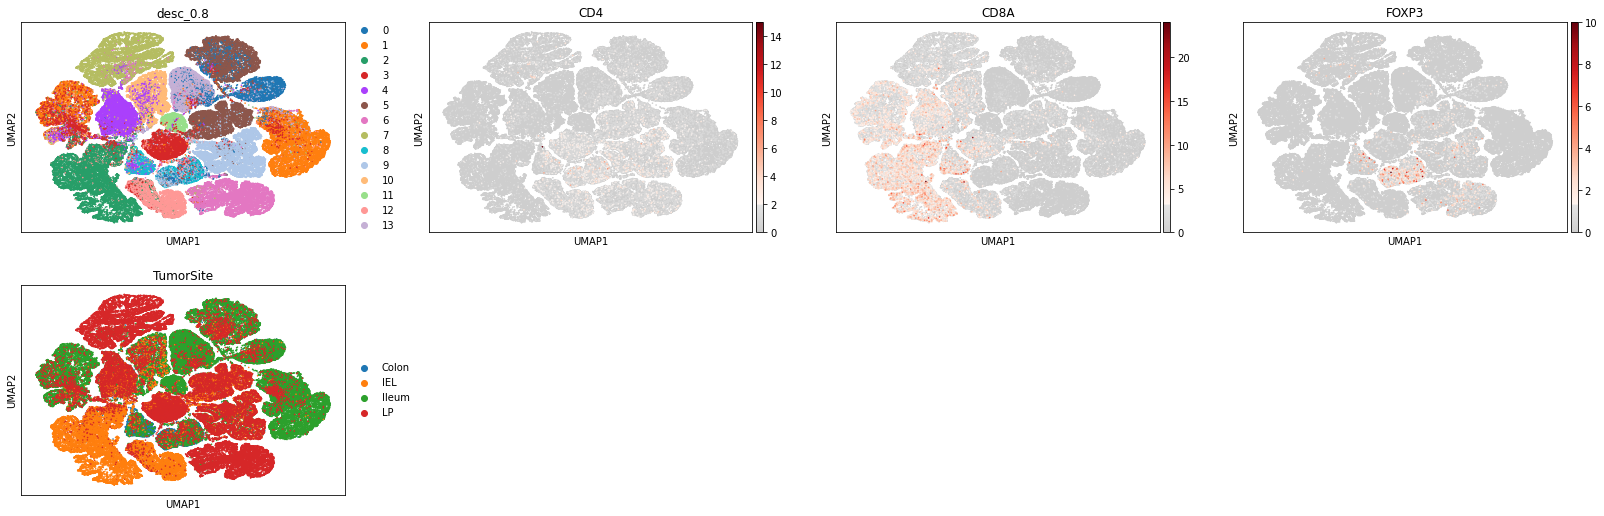

In [64]:
%matplotlib inline
sc.pl.umap(adata2, color=['desc_0.8','CD4','CD8A','FOXP3','TumorSite'],s=10,color_map=mymap,neighbors_key="Embeded_z0.5")


In [65]:
adata2.X

array([[-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163,  1.0434302 ],
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163, -0.45496988],
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163,  1.0434302 ],
       ...,
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163, -0.45496988],
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
         4.239531  , -0.45496988],
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163, -0.45496988]], dtype=float32)